In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import warnings
warnings.filterwarnings('ignore')

# 1. Data Loading & Preprocessing

In [16]:
# 로밍데이터
roam1 = pd.read_csv('./data/corona_contest_data_0406/2. Roaming_data.csv')
roam2 = pd.read_csv('./data/corona_contest_data_0429/2. Roaming_data.csv')

In [17]:
roam = pd.concat([roam1, roam2])
roam.head()

,return,iso,arrival,departure,count
0,20200131,ad,20200130,20200130,3
1,20200131,ae,20191231,20200125,3
2,20200131,ae,20191231,20200131,3
3,20200131,ae,20200102,20200102,3
4,20200131,ae,20200104,20200131,3


In [18]:
print(roam1.shape)
print(roam2.shape)
print(roam.shape)

(212325, 5)
(5480, 5)
(217805, 5)


In [19]:
# 날짜 변수로 변경
roam['return'] = pd.to_datetime(roam['return'], format='%Y%m%d')
roam['arrival'] = pd.to_datetime(roam['arrival'], format='%Y%m%d')
roam['departure'] = pd.to_datetime(roam['departure'], format='%Y%m%d')

# 파생변수 생성
# arrival과 return의 차를 내서 해외에 체류한 일자수를 계산함
roam['stay'] = roam['return'] - roam['arrival']

# 주요국가 추출

- 중국, 유럽, 미국, 일본, 대만, 베트남, 태국 정도만 추출

- CN 중국 CHINA(PEOPLE'SREP)
- MO 중국(마카오) MACAO
- HK 중국(홍콩) CHINA(HONGKONG)
- GB 영국
- DE 독일
- ES 스페인
- IT 이태리
- FR 프랑스
- PT 포르투갈
- JP 일본
- TH 태국
- TW 대만
- AU 호주
- NZ 뉴질랜드

In [35]:
country_list = ['cn', 'mo', 'hk', 'gb', 'de', 
                'es', 'it', 'fr', 'pt', 'jp',
                'th', 'tw', 'au', 'nz']

In [36]:
cond = lambda x: x in country_list

In [52]:
def find(x):
    if x in country_list:
        res = True
    else:
        res = False
    return res

In [53]:
cond = lambda x: find(x)

In [69]:
for idx in range(len(country_list)):
    if idx == 0:
        res = roam[roam['iso'] == '{}'.format(country_list[idx])]
    else:
        tmp = roam[roam['iso'] == '{}'.format(country_list[idx])] 
        pd.concat([res, tmp])
        
res

,return,iso,arrival,departure,count,stay
323,2020-01-31,cn,2019-12-31,2019-12-31,5,31 days
324,2020-01-31,cn,2019-12-31,2020-01-02,3,31 days
325,2020-01-31,cn,2019-12-31,2020-01-06,3,31 days
326,2020-01-31,cn,2019-12-31,2020-01-14,3,31 days
327,2020-01-31,cn,2019-12-31,2020-01-30,4,31 days
...,...,...,...,...,...,...
5233,2020-04-01,cn,2020-03-30,2020-03-30,3,2 days
5234,2020-04-01,cn,2020-03-30,2020-03-31,3,2 days
5235,2020-04-01,cn,2020-03-31,2020-03-31,12,1 days
5236,2020-04-01,cn,2020-03-31,2020-04-01,3,1 days


In [70]:
res.iso.unique()

array(['cn'], dtype=object)

In [20]:
# covide-19 글로벌 kaggle 데이터
kag = pd.read_csv('./data/corona-virus-report_0430/covid_19_clean_complete.csv')
kag['Date'] = pd.to_datetime(kag['Date'])
kag_dated_1 = kag.groupby(['Date'], as_index=False)['Confirmed','Deaths', 'Recovered'].sum()

# 각 컬럼별 일별 데이터 산출

cols = list(kag_dated_1.columns[1:])
for col in cols:
    col_name = "Day"+str(col)
    kag_dated_1['{}'.format(col_name)] = kag_dated_1['{}'.format(col)].diff()
    kag_dated_1['{}'.format(col_name)].iloc[0] = 0

In [21]:
# 한국데이터 추출
kag_kor = kag.loc[kag['Country/Region']=='South Korea']
kor = kag_kor.copy()
kor.reset_index(inplace=True)
# 불필요 변수 삭제
kor.drop('index', axis=1, inplace=True)
kor.drop('Province/State', axis=1, inplace=True)

# 대한민국 일별 확진자수 컬럼 형성
kor['DayConfirmed'] = kor['Confirmed'].diff()
kor['DayConfirmed'].iloc[0] = 0

In [22]:
kor.drop(['Country/Region','Lat','Long'], axis=1, inplace=True)

In [23]:
# covid-19 kor 캐글 데이터
cov_kor = pd.read_csv("./data/coronavirusdataset_0430/Patientinfo.csv")

In [24]:
cov_kor['infection_case'].unique()

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', 'Onchun Church',
       'Cheongdo Daenam Hospital', 'Suyeong-gu Kindergarten', nan,
       'Ministry of Oceans and Fisheries', 'gym facility in Cheonan',
       'gym facility in Sejong', 'River of Grace Community Church',
       'Gyeongsan Seorin Nursing Home',
       'Gyeongsan Cham Joeun Community Center',
       'Gyeongsan Jeil Silver Town', 'Bonghwa Pureun Nursing Home',
       'Pilgrimage to Israel', 'Milal Shelter', 'Geochang Church',
       'Changnyeong Coin Karaoke'], dtype=object)

In [25]:
cov_kor.isnull().sum()

patient_id               0
global_num            1112
sex                     77
birth_year             461
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

In [26]:
cov_kor[cov_kor['infection_case'] == 'overseas inflow']

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
7,1000000008,13.0,male,1992.0,20s,Korea,Seoul,etc,NaN,overseas inflow,1.0,NaN,0.0,NaN,2020-02-02,2020-02-24,NaN,released
8,1000000009,19.0,male,1983.0,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,2.0,NaN,68.0,NaN,2020-02-05,2020-02-21,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382,7000000008,9457.0,female,NaN,10s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,25.0,NaN,2020-03-27,2020-04-12,NaN,released
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [27]:
# 해외유입 확진자만 추출
cov_kor_1 = cov_kor[cov_kor['infection_case'] == 'overseas inflow'].groupby(['confirmed_date'])[['patient_id']].count()

In [28]:
cov_kor_1['cumsum'] = cov_kor_1['patient_id'].cumsum()

In [29]:
cov_kor_1.reset_index(inplace=True)
cov_kor_1.rename(columns={'cumsum':'Confirmed',
                          'patient_id':'DayConfirmed', 
                          'confirmed_date':'Date'}, inplace=True)
cov_kor_1 = cov_kor_1[['Date', 'Confirmed','DayConfirmed']]

In [30]:
cov_kor_1

,Date,Confirmed,DayConfirmed
0,2020-01-20,1,1
1,2020-01-23,2,1
2,2020-01-26,3,1
3,2020-01-27,4,1
4,2020-01-30,6,2
...,...,...,...
69,2020-04-25,592,7
70,2020-04-26,595,3
71,2020-04-27,601,6
72,2020-04-28,603,2


In [31]:
# 해외유입 확진자 질본 크롤링 데이터 
osi = pd.read_csv("./data/oversea_inflow.csv", engine='python')
osi.rename(columns={'date':'Date'},inplace=True)

In [32]:
osi

,Date,oversea_inflow,�씪�씪_�솗吏꾩옄,以묎뎅,以묎뎅_�쇅_�븘�떆�븘,�쑀�읇,誘몄＜,�븘�봽由ъ뭅,�샇二�,寃��뿭�떒怨�,吏��뿭�궗�쉶,�궡援��씤,�쇅援��씤
0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-22,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-24,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2020-05-01,1073,8.0,0.0,4.0,1.0,3.0,0.0,0.0,4.0,4.0,3.0,5.0
103,2020-05-02,1081,6.0,0.0,2.0,1.0,3.0,0.0,0.0,3.0,3.0,4.0,2.0
104,2020-05-03,1091,10.0,0.0,4.0,2.0,4.0,0.0,0.0,5.0,5.0,9.0,1.0
105,2020-05-04,1099,8.0,0.0,5.0,0.0,3.0,0.0,0.0,4.0,4.0,8.0,0.0


In [33]:
# 변수 추출
osi = osi[['Date', 'oversea_inflow']]
# 마지막 row NaN값 제거
osi = osi[:-1]
osi['Date'] = pd.to_datetime(osi['Date'])

In [34]:
# 불필요한 첫번째 행 삭제
osi.drop(0, axis=0, inplace=True)

# 2. Merge Datesets
- 데이터 셋 병합은 5가지 데이터를 병합한다.
- 로밍 데이터, 캐글 글로벌 확진자수, 글로벌 데이터로 부터 추출된 한국의 확진자 데이터, 대한민국 코로나 캐글 데이터에서의 해외유입 데이터, 크롤링한 해외유입데이터이다.
    - new_roam
    - glob
    - kor
    - cov_kor
    - osi
    
- 대한민국의 해외유입감염자수를 Target Feature로 놓고 분석을 진행한다.

In [17]:
new_roam = roam.groupby(['return'], as_index=False)['count'].sum()
new_roam.rename(columns = {'return':'Date'}, inplace=True)

In [18]:
glob = kag_dated_1
new_kor = kor

In [19]:
cov_kor_os = cov_kor[cov_kor['infection_case'] == 'overseas inflow']

In [20]:
kor_os = cov_kor_os.groupby(['confirmed_date'], as_index=False)[['patient_id']].count()
kor_os.rename(columns={'confirmed_date':'Date', 'patient_id':'Confirmed_os'}, inplace=True)
kor_os['Date'] = pd.to_datetime(kor_os['Date'])

In [21]:
kor_os.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          74 non-null     datetime64[ns]
 1   Confirmed_os  74 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB


In [21]:
kag_dated_1 = kag.groupby(['Date'], as_index=False)['Confirmed','Deaths', 'Recovered'].sum()

In [22]:
new_kor.head()

,Date,Confirmed,Deaths,Recovered,DayConfirmed
0,2020-01-22,1,0,0,0.0
1,2020-01-23,1,0,0,0.0
2,2020-01-24,2,0,0,1.0
3,2020-01-25,2,0,0,0.0
4,2020-01-26,3,0,0,1.0


In [23]:
new_roam.head()

,Date,count
0,2019-12-01,23551
1,2019-12-02,20008
2,2019-12-03,17116
3,2019-12-04,19067
4,2019-12-05,18594


In [24]:
df = pd.merge(osi, new_roam, on='Date')

In [25]:
df = pd.merge(df, glob, on='Date')

In [26]:
df = pd.merge(df, new_kor, on='Date')

In [27]:
df = pd.merge(df, kor_os, on='Date')

In [28]:
df.tail()

,Date,oversea_inflow,count,Confirmed_x,Deaths_x,Recovered_x,DayConfirmed_x,DayDeaths,DayRecovered,Confirmed_y,Deaths_y,Recovered_y,DayConfirmed_y,Confirmed_os
54,2020-04-11,886.0,1091,1771512,108503,395513,79795.0,5978.0,25279.0,10480,211,7243,30.0,2
55,2020-04-12,912.0,732,1846676,114091,414591,75164.0,5588.0,19078.0,10512,214,7368,32.0,12
56,2020-04-13,929.0,728,1917316,119482,440889,70640.0,5391.0,26298.0,10537,217,7447,25.0,5
57,2020-04-14,940.0,730,1976188,125984,466043,58872.0,6502.0,25154.0,10564,222,7534,27.0,9
58,2020-04-15,955.0,787,2056051,134177,502045,79863.0,8193.0,36002.0,10591,225,7616,27.0,6


In [29]:
# 10일 동안의 NA 값 대체
for i in range(18,29):
    df['oversea_inflow'].iloc[i] = df['oversea_inflow'].iloc[i-1] + df['Confirmed_os'].iloc[i]

In [30]:
# 변수명 정리

df.rename(columns = {'count' : 'roam',
                     'Confirmed_x':'g_confirmed',
                     'Deaths_x':'g_deaths',
                     'Recovered_x':'g_recovered',
                     'DayConfirmed_x':'g_dayconfirmed',
                     'DayDeaths':'g_daydeaths',
                     'DayRecovered':'g_dayrecovered',
                     'Confirmed_y':'k_confirmed',
                     'Deaths_y' : 'k_deaths',
                     'Recovered_y' : 'k_recoverd',
                     'DayConfirmed_y':'k_dayconfirmed',
                     'Confirmed_os':'k_day_osi_1'}, inplace=True)

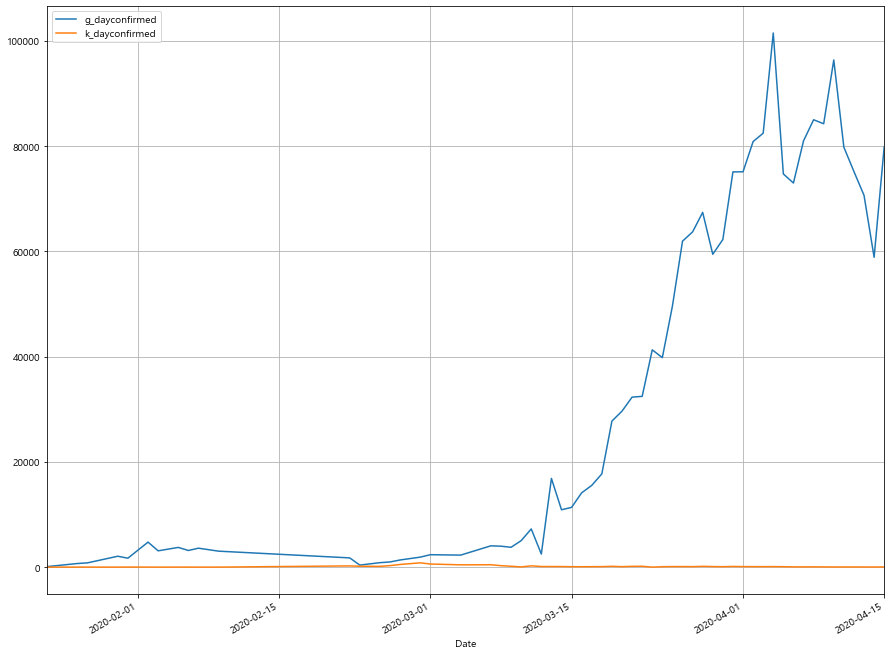

In [31]:
df.plot(kind='line', x='Date', y=['g_dayconfirmed','k_dayconfirmed'],
                                            figsize=(15,12),
                                            legend=True,
                                            grid=True)

In [32]:
df.head()

,Date,oversea_inflow,roam,g_confirmed,g_deaths,g_recovered,g_dayconfirmed,g_daydeaths,g_dayrecovered,k_confirmed,k_deaths,k_recoverd,k_dayconfirmed,k_day_osi_1
0,2020-01-23,1.0,21559,654,18,30,99.0,1.0,2.0,1,0,0,0.0,1
1,2020-01-26,3.0,26214,2118,56,52,684.0,14.0,13.0,3,0,0,1.0,1
2,2020-01-27,4.0,32114,2927,82,61,809.0,26.0,9.0,4,0,0,1.0,1
3,2020-01-30,6.0,20240,8234,171,143,2068.0,38.0,17.0,4,0,0,0.0,2
4,2020-01-31,7.0,21728,9927,213,222,1693.0,42.0,79.0,11,0,0,7.0,1


In [33]:
df.tail()

,Date,oversea_inflow,roam,g_confirmed,g_deaths,g_recovered,g_dayconfirmed,g_daydeaths,g_dayrecovered,k_confirmed,k_deaths,k_recoverd,k_dayconfirmed,k_day_osi_1
54,2020-04-11,886.0,1091,1771512,108503,395513,79795.0,5978.0,25279.0,10480,211,7243,30.0,2
55,2020-04-12,912.0,732,1846676,114091,414591,75164.0,5588.0,19078.0,10512,214,7368,32.0,12
56,2020-04-13,929.0,728,1917316,119482,440889,70640.0,5391.0,26298.0,10537,217,7447,25.0,5
57,2020-04-14,940.0,730,1976188,125984,466043,58872.0,6502.0,25154.0,10564,222,7534,27.0,9
58,2020-04-15,955.0,787,2056051,134177,502045,79863.0,8193.0,36002.0,10591,225,7616,27.0,6


In [35]:
# 데이터 프레임 저장
df.to_csv('./data/total.csv')